In [12]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set1')


In [7]:
def f(x):
    return x**3

In [8]:
# Common parameters
x  = np.linspace(0, 1, 100)
h  = 0.2
x0 = 0.5

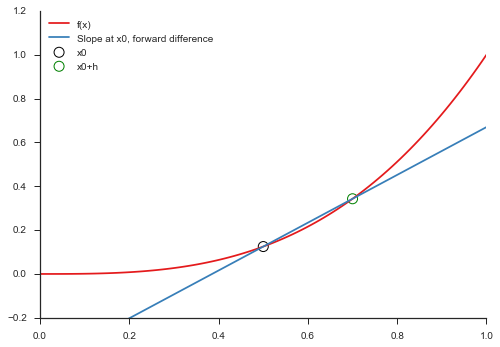

In [29]:
# Calculate two points, draw line throgh points,
# using forward finite difference

a = (f(x0+h) - f(x0))/h
b = f(x0) - x0*a

# plot f(x), and the approximation to the tangent
plt.plot(x, f(x), label = 'f(x)')
plt.plot(x, a*x + b, label = 'Slope at x0, forward difference')
# Add markers at x0 and x0+h
plt.scatter(x0, f(x0), marker = 'o', linewidth = 1, facecolor = 'none', edgecolor = 'k', s =100, label = 'x0')
plt.scatter(x0+h, f(x0+h), marker = 'o', linewidth = 1, facecolor = 'none', edgecolor = 'g', s =100, label = 'x0+h')
plt.xlim((0,1))
plt.ylim((-0.2, 1.2))
plt.legend(loc = 'best')
sns.despine()


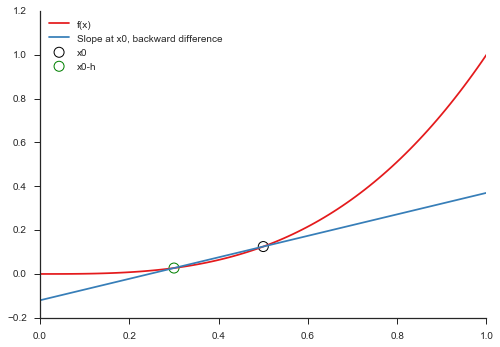

In [32]:
# Calculate two points, draw line throgh points,
# using backward finite difference

a = (f(x0) - f(x0-h))/h
b = f(x0) - x0*a

# plot f(x), and the approximation to the tangent
plt.plot(x, f(x), label = 'f(x)')
plt.plot(x, a*x + b, label = 'Slope at x0, backward difference')
# Add markers at x0 and x0+h
plt.scatter(x0, f(x0), marker = 'o', linewidth = 1, facecolor = 'none', edgecolor = 'k', s =100, label = 'x0')
plt.scatter(x0-h, f(x0-h), marker = 'o', linewidth = 1, facecolor = 'none', edgecolor = 'g', s =100, label = 'x0-h')
# Set plot limits, add legend and remove top and right axis
plt.xlim((0,1))
plt.ylim((-0.2, 1.2))
plt.legend(loc = 'best')
sns.despine()


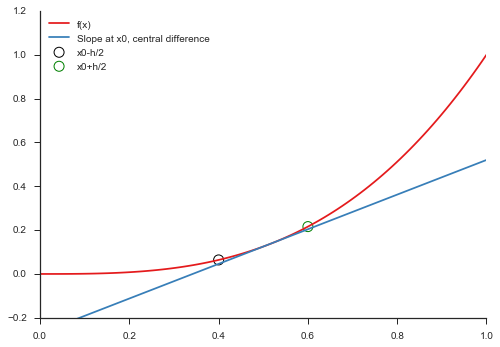

In [33]:
# Calculate two points, draw line throgh points,
# using central finite difference

a = (f(x0+h) - f(x0-h))/(2*h)
b = f(x0) - x0*a

# plot f(x), and the approximation to the tangent
plt.plot(x, f(x), label = 'f(x)')
plt.plot(x, a*x + b, label = 'Slope at x0, central difference')
# Add markers at x0 and x0+h
plt.scatter(x0-h/2, f(x0-h/2), marker = 'o', linewidth = 1, facecolor = 'none', edgecolor = 'k', s =100, label = 'x0-h/2')
plt.scatter(x0+h/2, f(x0+h/2), marker = 'o', linewidth = 1, facecolor = 'none', edgecolor = 'g', s =100, label = 'x0+h/2')
# Set plot limits, add legend and remove top and right axis
plt.xlim((0,1))
plt.ylim((-0.2, 1.2))
plt.legend(loc = 'best')
sns.despine()

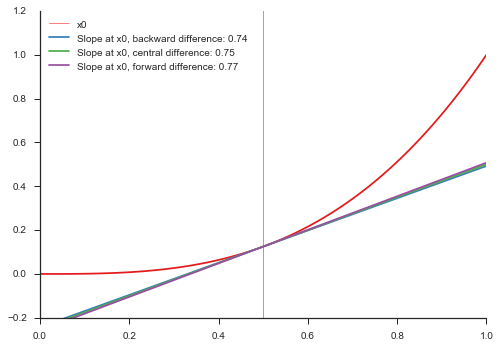

In [37]:
# Calculate two point, draw line throgh points,
# using backward, central and forward finite difference

h = 0.01

plt.plot(x, f(x))
plt.plot([x0, x0], [-1, 2], color = 'r', lw = 0.5, label = 'x0')

a = (f(x0) - f(x0-h))/h
b = f(x0) - x0*a
plt.plot(x, a*x + b, label = 'Slope at x0, backward difference: %.2f' % a)

a = (f(x0+h) - f(x0-h))/(2*h)
b = f(x0) - x0*a
plt.plot(x, a*x + b, label = 'Slope at x0, central difference: %.2f' % a)

a = (f(x0+h) - f(x0))/h
b = f(x0) - x0*a
plt.plot(x, a*x + b, label = 'Slope at x0, forward difference: %.2f' % a)

plt.xlim((0,1))
plt.ylim((-0.2, 1.2))
plt.legend(loc = 'best')
sns.despine()

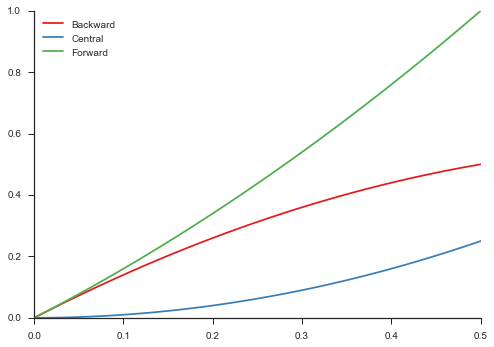

In [38]:
def get_line(x0, x1, y0, y1):
    # Function to calculate a and b, for f(x) = ax + b,
    # using two points, (x0, y0) and (x1, y1)
    a = (y1 - y0)/(x1 - x0)
    b = y0 - x0*a
    return a, b

def f(x):
    return x**3

# Calculate derivative for N different values
# of h, evenly spaced from 0.001 to 0.05
N  = 100
x0 = 0.5
h_values = np.linspace(0.001, 0.5, N)
# Arrays to store the errors as function of h,
# for plotting
backward_error = np.zeros(N)
central_error  = np.zeros(N)
forward_error  = np.zeros(N)

# The actual derivative of x**3 at x=0.5
# 3*0.5**2 = 0.75
actual = 0.75

for i, h in enumerate(h_values):
    # Backward
    a, b = get_line(x0-h, x0, f(x0-h), f(x0))
    backward_error[i] = abs(actual - a)
    # Central
    a, b = get_line(x0-h, x0+h, f(x0-h), f(x0+h))
    central_error[i] = abs(actual - a)
    # Forward
    a, b = get_line(x0, x0+h, f(x0), f(x0+h))
    forward_error[i] = abs(actual - a)
    
plt.plot(h_values, backward_error, label = 'Backward')
plt.plot(h_values, central_error, label = 'Central')
plt.plot(h_values, forward_error, label = 'Forward')
plt.legend(loc = 'best')
sns.despine()